In [2]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection.txt', sep='\t',
                           names=["label", "message"])

In [4]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)                #selceting only top 2500 words 
X = cv.fit_transform(corpus).toarray()

In [7]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
print(corpus)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis wont 

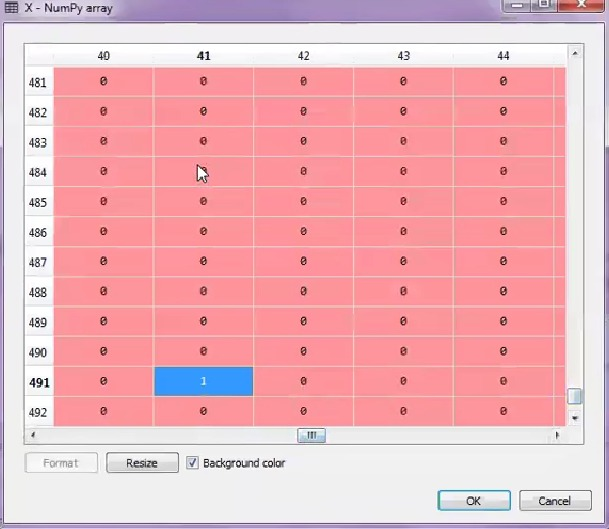

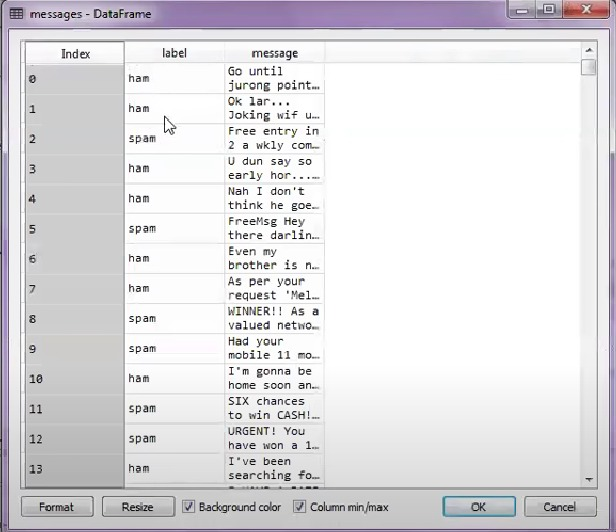

In [13]:
y=pd.get_dummies(messages['label'])

In [14]:
print(y)

      ham  spam
0       1     0
1       1     0
2       0     1
3       1     0
4       1     0
...   ...   ...
5567    0     1
5568    1     0
5569    1     0
5570    1     0
5571    1     0

[5572 rows x 2 columns]


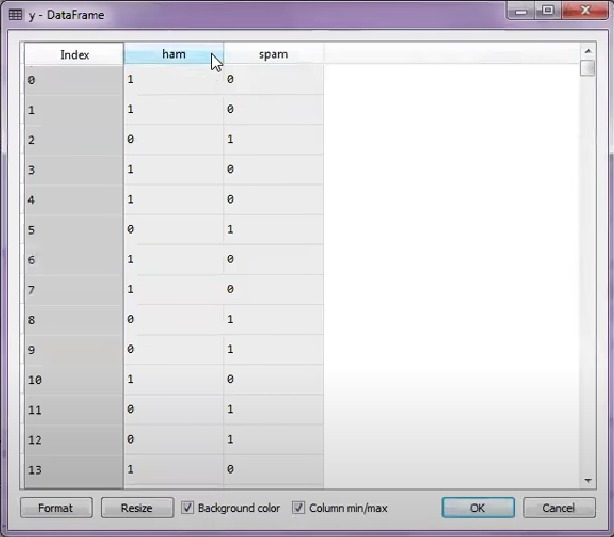

In [15]:
y=y.iloc[:,1].values

In [16]:
print(y)

[0 0 1 ... 0 0 0]


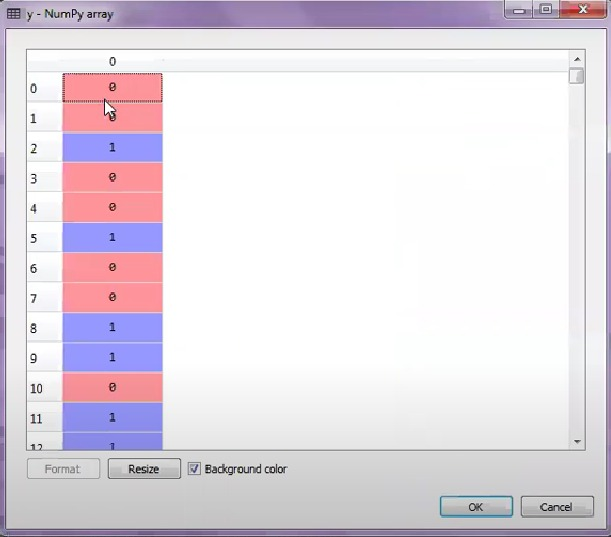

# Now our X and Y tables are ready 

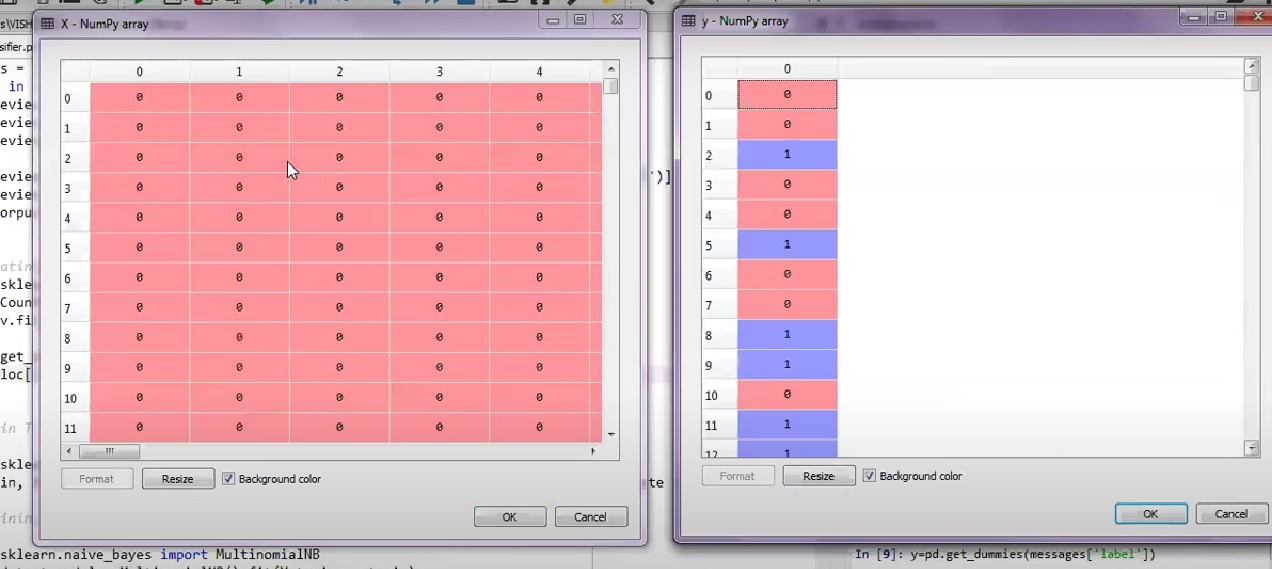

In [17]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [30]:
# Training model using Naive bayes classifier- because naive bayes is best for NLP problems

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [19]:
print(y_pred)

[0 1 0 ... 0 1 0]


In [21]:
print(y_test)

[0 1 0 ... 0 1 0]


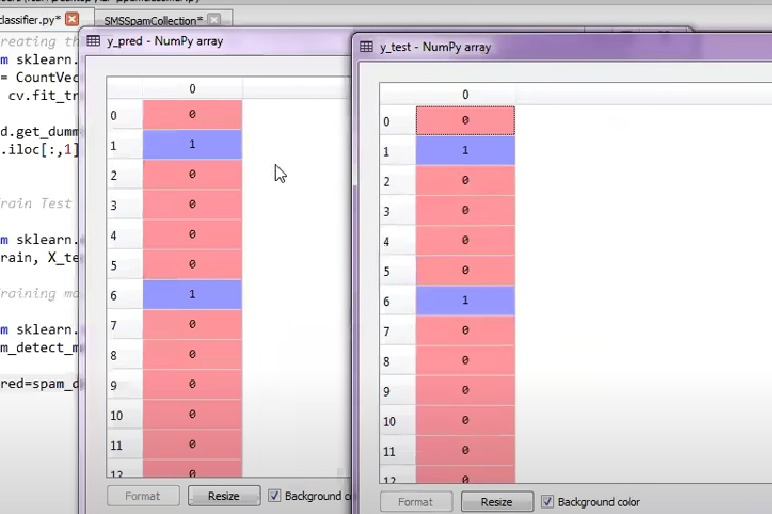

for comparing y_pred and y_test we will use confusion matrix 

In [25]:
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)

In [29]:
print(confusion_m)

[[946   9]
 [  7 153]]


In [26]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)

In [27]:
print(accuracy)

0.9856502242152466
